# Data Analysis Project Life Cycle
- **Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**

## Business Problem:
**Client Wants to analyze their Diwali sales data to understand the trend, to understand the highest and lowest performing categories and prepare accordingly to improve sales in future**

## Data Collection:
- Data is provided by the client as a csv file
- Link: https://drive.google.com/file/d/1BPotfWkpOV5kr72UPZpsCcf3w_bxyaCN/view?usp=sharing


In [60]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Loading the data set
data = pd.read_csv(r"B:\Summer_Training_2024\Diwali_Sales_Analysis\Diwali_Sales_Data.csv", encoding = 'unicode_escape')
# To avoid unicide error, 'unicode_escape' is used

In [15]:
# Checking the data
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [67]:
# Creating a copy of the dataset
df = data.copy()

## Data Preparation
- **Data Profiling**
- **Data Cleaning**
- **Data Consistancy**
- **Data formatting**
- **Outlier Detection**

### Data Profiling

In [68]:
# Data shape
df.shape

(11345, 15)

In [69]:
# Feature details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [70]:
# All columns
all_columns = df.columns
all_columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [71]:
# Numeric columns
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [72]:
# Non Numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [73]:
# Checking for duplicate entries
df_duplicate = df[df.duplicated()]
print("The size of duplicate data is: \n", df_duplicate.shape)
print("The duplicate dataset:")
df_duplicate.head()

The size of duplicate data is: 
 (40, 15)
The duplicate dataset:


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
4404,1004725.0,Jackson,P00150842,F,36-45,37,1.0,Maharashtra,Western,Hospitality,Electronics & Gadgets,4.0,9859,NaN,NaN
5703,1003208.0,Bowman,P00171642,F,26-35,31,0.0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4.0,8088,NaN,NaN
5908,1001260.0,Dheeraj,P00344042,M,26-35,28,0.0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4.0,8015,NaN,NaN
6173,1001325.0,Reese,P00111742,F,26-35,27,1.0,Gujarat,Western,Construction,Electronics & Gadgets,3.0,7923,NaN,NaN
8651,1000083.0,Gute,P00242842,M,26-35,35,0.0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3.0,5345,NaN,NaN


In [74]:
# Filtering out the duplicate entries
df = df[~df.duplicated()]
print("The shape of non-duplicate dataset is: \n", df.shape)

# Check for duplicate, if still exists
df[df.duplicated()]

The shape of non-duplicate dataset is: 
 (11305, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


In [81]:
# Checking for null values
df_null = df.isna().sum()

# Null values as percentage
df_null_percen = (df.isna().sum()/(df.shape[0]))*100

null_values = pd.DataFrame({'null_value': df_null, 'percentage': df_null_percen})
null_values

,null_value,percentage
User_ID,24,0.212295
Cust_name,1,0.008846
Product_ID,4,0.035383
Gender,4,0.035383
Age Group,6,0.053074
Age,11,0.097302
Marital_Status,6,0.053074
State,13,0.114993
Zone,11,0.097302
Occupation,6,0.053074


In [82]:
# Checking for unique values of features
df_unique = df.count()
df_unique

User_ID             11281
Cust_name           11304
Product_ID          11301
Gender              11301
Age Group           11299
Age                 11294
Marital_Status      11299
State               11292
Zone                11294
Occupation          11299
Product_Category    11294
Orders              11302
Amount              11291
Status                  0
unnamed1                0
dtype: int64

### Column Manipulations to be done
- ***Amount***
    - It has non-numeric values, should be dropped
    - It has null values, should be dropped
    - Data type should be changed to number
- ***Status***
    - No data, should be dropped
- ***unnamed1***
    - No data, should be dropped
- ***Orders***
    - It has null values, should be dropped
- ***State***
    - It has some typing errors. 'Andhra\xa0Pradesh' should be replaced with 'Andhra Pradesh'
    - Rows corresponding to null values can be dropped
- ***Zone***
    - It has typing error. 'Zentral' should be replaced with 'Central'
    - Rows corresponding to null values can be dropped
- ***Product_ID***
    - Rows corresponding to null values can be dropped

- ***Marital_Status***
    - '0' should be replaced with Unmarried and '1' should be replaced with Married
    - Null values can be replaced with mode
- ***Age***
    - Data type should be changed to numeric
    - Null values can be replaced with mode
- ***Age Group***
    - Null values can be replaced with mode
    - There is inconsistant data. 'low-high' should be replaced with mode
- ***Gender, Occupation, Product_Category***
    - Null values can be replaced with mode




### Data Cleaning

#### Status & unnamed1

In [83]:
# Dropping the columns: 'Status' & 'unnamed1'
df.drop(columns = ['Status', 'unnamed1'], inplace = True)

#### Amount

In [84]:
# Changing the data type of 'Amount' to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce') 
# errors = 'coerce' convert non-numeric values to NaN

In [85]:
# Dropping null values corresponding to columns = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID']
df.dropna(subset = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID'], inplace = True)


#### State

In [86]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Nndhra\xa0Pradesh', 'Madhya Pradesh', 'Bihar', 'Rajasthan',
       'Haryana', 'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [87]:
# Replacing 'Andhra\xa0Pradesh' and 'Nndhra\xa0Pradesh' with 'Andhra Pradesh'
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh', 'Andhra Pradesh')
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh', 'Andhra Pradesh')
df['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Haryana', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

#### Zone

In [89]:
df.Zone.unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Zentral', 'Eastern'],
      dtype=object)

In [90]:
# Replacing 'Zentral' with 'Central'
df['Zone'] = df.Zone.replace('Zentral', 'Central')
df.Zone.unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

#### Marital_Status

In [91]:
# Replacing the null values with mode
marital_status_mode = df['Marital_Status'].mode()[0]
df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode)


In [92]:
df['Marital_Status'].unique()

array([0., 1.])

In [93]:
# Creating a new text column for marital status
df['Marital_Status_Name'] = df['Marital_Status'].apply(lambda x: 'Married' if(x ==  1.) else 'Unmarried')
df['Marital_Status_Name'].unique()

array(['Unmarried', 'Married'], dtype=object)

#### Age

In [94]:
# Converting datatype from object to numeric. 
# errors = 'coerce' will convert non-numeric values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')


In [95]:
# Replacing null values with mode
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)
df['Age'].isnull().sum()

0

#### Age Group

In [107]:
# Replacing null values and ''low-high'' with mode
age_group_mode = df['Age Group'].mode()[0]
df['Age Group'] = df['Age Group'].fillna(age_group_mode)
df['Age Group'] = df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'].isna().sum()


0

#### Gender, Occupation, Product_Category

In [103]:
# Replacing null values with mode

# Gender
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

#Occupation
occupation_mode = df['Occupation'].mode()[0]
df['Occupation'] = df['Occupation'].fillna(occupation_mode)

# Product_Category
product_category_mode = df['Product_Category'].mode()[0]
df['Product_Category'] = df['Product_Category'].fillna(product_category_mode)

#### User_ID

In [104]:
# Filling with mode
user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] = df['User_ID'].fillna(user_id_mode)

In [111]:
# Cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11262 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              11262 non-null  float64
 1   Cust_name            11262 non-null  object 
 2   Product_ID           11262 non-null  object 
 3   Gender               11262 non-null  object 
 4   Age Group            11262 non-null  object 
 5   Age                  11262 non-null  float64
 6   Marital_Status       11262 non-null  float64
 7   State                11262 non-null  object 
 8   Zone                 11262 non-null  object 
 9   Occupation           11262 non-null  object 
 10  Product_Category     11262 non-null  object 
 11  Orders               11262 non-null  float64
 12  Amount               11262 non-null  float64
 13  Marital_Status_Name  11262 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [106]:
df.isnull().sum()

User_ID                0
Cust_name              0
Product_ID             0
Gender                 0
Age Group              0
Age                    0
Marital_Status         0
State                  0
Zone                   0
Occupation             0
Product_Category       0
Orders                 0
Amount                 0
Marital_Status_Name    0
dtype: int64

### Statistical Analysis

### Outlier detection

In [50]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.126200e+04,11262.000000,11262.000000,11262.000000,1.126200e+04
mean,1.013656e+06,35.421595,0.419730,2.494495,1.915489e+05
std,3.262528e+05,12.751490,0.493537,1.186879,1.072525e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001495e+06,27.000000,0.000000,2.000000,5.445000e+03
50%,1.003062e+06,33.000000,0.000000,2.000000,8.114500e+03
75%,1.004430e+06,43.000000,1.000000,3.000000,1.270475e+04
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08


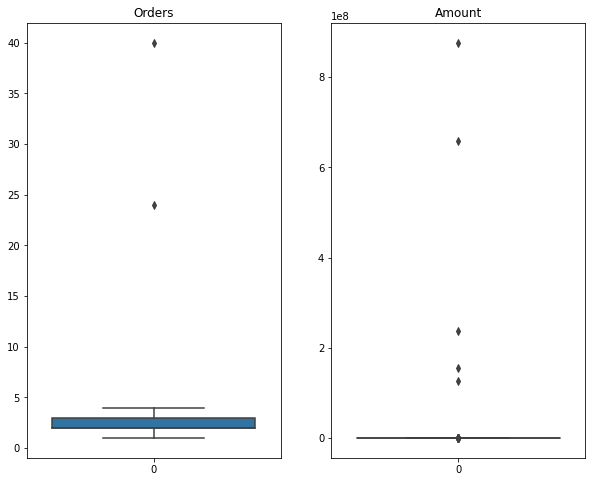

In [53]:
# Plotting the box plot for 'Orders and 'Amount' column
fig,ax = plt.subplots(1,2,figsize = (10,8))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title('Orders')
sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title('Amount')
plt.show()

#### Removing outliers
- Order column
- Amount Column

In [112]:
# Removing outliers from 'Orders' column
Q1 = df['Orders'].quantile(0.25)
Q3 = df['Orders'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_orders = Q1 - 1.5*IQR
upper_limit_orders = Q3 + 1.5*IQR
print("Lower Limit: ", lower_limit_orders)
print("Upper Limit: ", upper_limit_orders)

Lower Limit:  0.5
Upper Limit:  4.5


In [113]:
# Filtering out the null values
df = df[(df['Orders'] > lower_limit_orders) & (df['Orders'] < upper_limit_orders)]
df['Orders'].unique()

array([1., 3., 2., 4.])

In [114]:
# Removing outliers from 'Amount' column
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1
upper_limit_amount = q3 + 1.5*iqr
lower_limit_amount = q1 - 1.5*iqr
print("lower Limits: ", upper_limit_amount)
print("upper limits: ", lower_limit_amount)

lower Limits:  23590.625
upper limits:  -5442.375


In [115]:
# Filtering out the null values
df = df[df['Amount'] < upper_limit_amount]
df['Amount'].unique()

array([23568., 23546., 23525., ...,   213.,   206.,   188.])

In [116]:
# Cleaned data statistics
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.124000e+04,11240.000000,11240.000000,11240.000000,11240.000000
mean,1.007450e+06,35.432473,0.419662,2.489769,9458.901819
std,2.108463e+05,12.758235,0.493526,1.114849,5219.153759
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.750000
50%,1.003062e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12691.000000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


#### Cleaned dataset

In [118]:
# Saving the cleaned data
df.to_csv("B:\Summer_Training_2024\Diwali_Sales_Analysis\data_cleaned.csv", index = False)

## Exploratory Data Analysis

In [480]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.128000e+04,11280.000000,11280.000000,11280.000000,11280.000000
mean,1.007434e+06,35.440780,0.419326,2.489716,9490.257614
std,2.104723e+05,12.747809,0.493471,1.115337,5246.435652
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001495e+06,27.000000,0.000000,1.750000,5445.750000
50%,1.003062e+06,33.000000,0.000000,2.000000,8116.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12712.250000
max,1.100173e+07,92.000000,1.000000,4.000000,23619.000000


#### Gender Wise Analysis

In [369]:
# Male-Female Order data
gender_data_order = df.groupby(['Gender'], as_index = False)['Orders'].count()
print("Order Count \n", gender_data_order)
print()

gender_data_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print("Purchase Power \n", gender_data_amount)

Order Count 
   Gender  Orders
0      F    7840
1      M    3400

Purchase Power 
   Gender       Amount
0      F  74527740.44
1      M  31790316.00


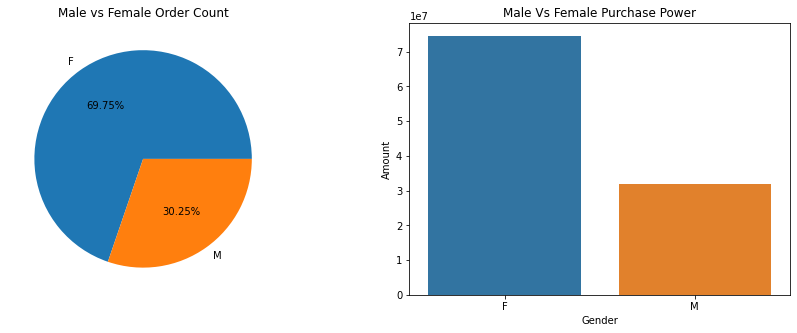

In [407]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

# Plotting pie chart
ax[0].pie(x = gender_data_order['Orders'],labels = gender_data_order['Gender'],autopct = "%1.2f%%")
ax[0].set_title("Male vs Female Order Count")

# Plotting a bar chart on amount sum
sns.barplot(x = 'Gender', y = 'Amount', data = gender_data_amount, ax = ax[1])
plt.title("Male Vs Female Purchase Power")


plt.show()

#### Conclusion:
Female orders more and also they have more purchase power

#### Married Vs Unmarried

In [408]:
# Plot Data
amount_marital_status = df.groupby(['Marital_Status_Name'], as_index = False)['Amount'].sum()
amount_marital_status

,Marital_Status_Name,Amount
0,Married,44045838.00
1,Unmarried,62272218.44


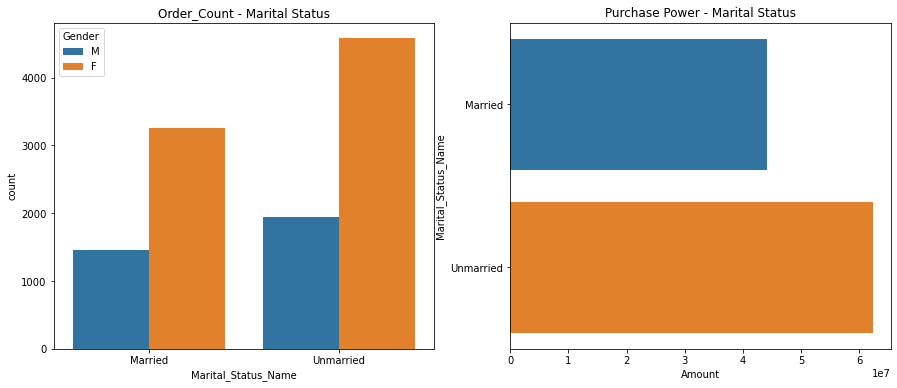

In [412]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (15,6))

# Plotting order count
sns.countplot(x = 'Marital_Status_Name', hue = 'Gender',data = df, ax = ax[0])

# Plotting Amount Sum
sns.barplot(y = 'Marital_Status_Name', x = 'Amount', data = amount_marital_status, orient = 'h', ax = ax[1])

ax[0].set_title("Order_Count - Marital Status")
ax[1].set_title("Purchase Power - Marital Status")
plt.show()


#### Conclusion:
Unmarried female makes more order, then married female and then unmarried male.

### Analysis based on age group

In [414]:
# Plot data
amount_age_group = df.groupby(['Age Group'],as_index = False)['Amount'].sum()
amount_age_group

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17074093.00
2,26-35,42645699.95
3,36-45,22276229.49
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


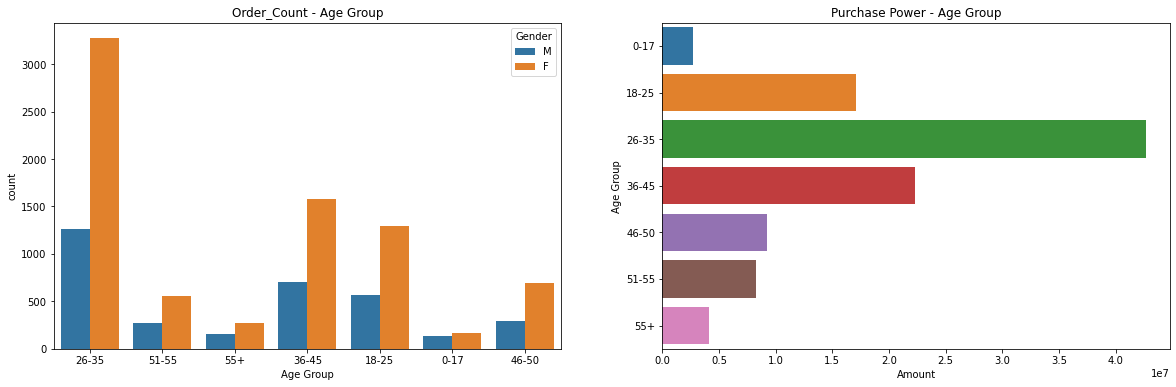

In [415]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,6))

# Plotting order count
sns.countplot(x = 'Age Group', hue = 'Gender',data = df, ax = ax[0])

# Plotting Amount Sum
sns.barplot(y = 'Age Group', x = 'Amount', data = amount_age_group, orient = 'h', ax = ax[1])

ax[0].set_title("Order_Count - Age Group")
ax[1].set_title("Purchase Power - Age Group")
plt.show()


#### Conclusion:
Maximum number of orders come from the age group 26-35

### State Wise Analysis

In [432]:
# Plot data for top 5 states
amount_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)[:5]
amount_state

,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14421711.00
7,Karnataka,13705829.00
2,Delhi,11638138.45
9,Madhya Pradesh,8121899.00


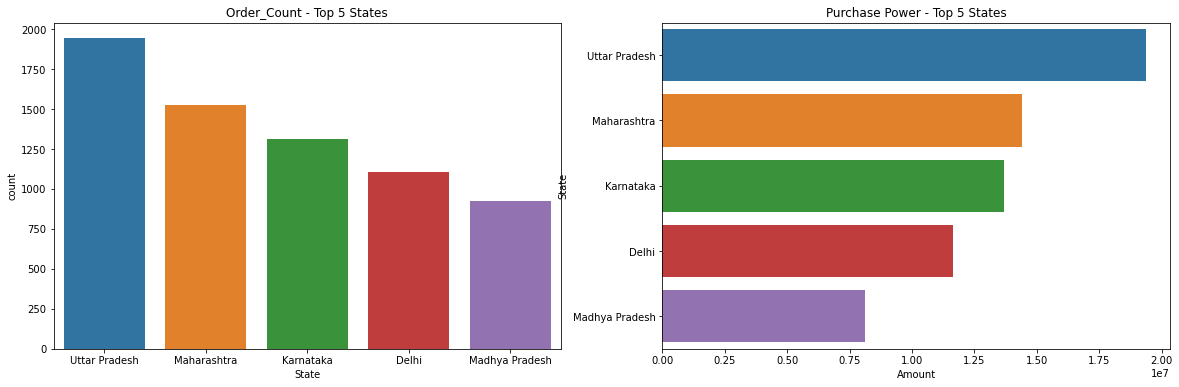

In [433]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,6))

# Plotting order count vs State
sns.countplot(x = 'State', data = df, order = df['State'].value_counts().nlargest(5).index, ax = ax[0])

# Plotting Amount Sum Vs State
sns.barplot(y = 'State', x = 'Amount', data = amount_state, orient = 'h', ax = ax[1])

ax[0].set_title("Order_Count - Top 5 States")
ax[1].set_title("Purchase Power - Top 5 States")
plt.show()

#### Conclusion:
The top performing states are: Uttar Pradesh, Maharashtra, Karnataka

### Occupation Wise Analysis

In [437]:
# Sale Data for people placing order from top 5 occupations
amount_occupation = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)[:5]
amount_occupation

,Occupation,Amount
10,IT Sector,14902488.00
8,Healthcare,12989061.49
2,Aviation,12638645.00
3,Banking,10788250.95
7,Govt,8425182.00


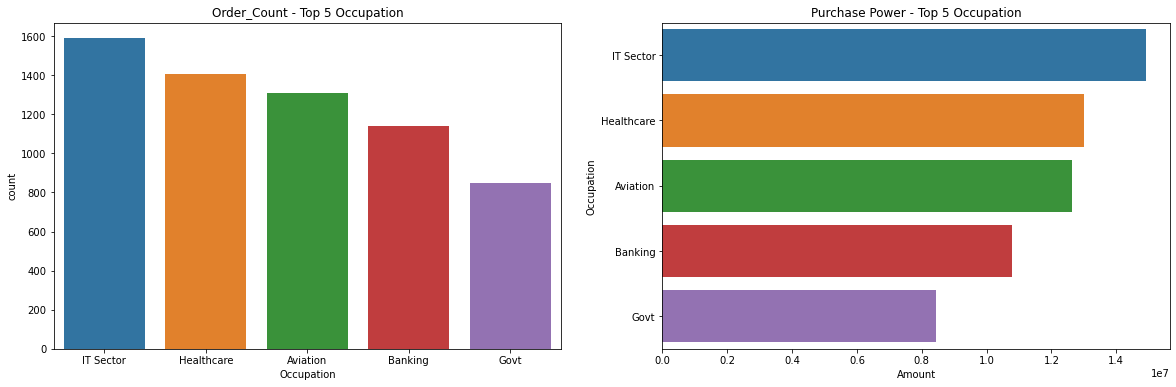

In [438]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,6))

# Plotting order count vs Occupation
sns.countplot(x = 'Occupation', data = df, order = df['Occupation'].value_counts().nlargest(5).index, ax = ax[0])

# Plotting Amount Sum Vs Occupation
sns.barplot(y = 'Occupation', x = 'Amount', data = amount_occupation, orient = 'h', ax = ax[1])

ax[0].set_title("Order_Count - Top 5 Occupation")
ax[1].set_title("Purchase Power - Top 5 Occupation")
plt.show()

#### Conclusion
People placing larger quantity of orders are from IT Sector, Healthcare and Aviation

### Product Category Wise Analysis

In [443]:
# Sale Data for top 5 performing categories
amount_product_category = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)[:5]
amount_product_category

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16610170.50
7,Footwear & Shoes,16009057.45
5,Electronics & Gadgets,15607657.00
8,Furniture,5481325.99


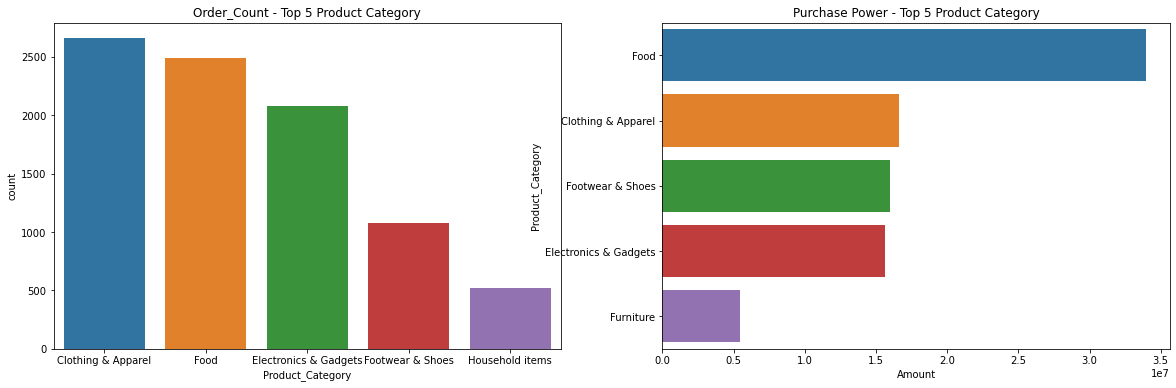

In [446]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,6))

# Plotting order count vs Product Category
sns.countplot(x = 'Product_Category', data = df, order = df['Product_Category'].value_counts().nlargest(5).index, ax = ax[0])

# Plotting Amount Sum Vs Product Category
sns.barplot(y = 'Product_Category', x = 'Amount', data = amount_product_category, orient = 'h', ax = ax[1])

ax[0].set_title("Order_Count - Top 5 Product Category")
ax[1].set_title("Purchase Power - Top 5 Product Category")
plt.show()

#### Conclustion
Top performing product categories are: Food, Clothing & Aparel, Footwear

### Product Wise Analysis

In [450]:
# Sale Data for top 10 performing products
amount_product = df.groupby(['Product_ID'],
                            as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)[:10]
amount_product


,Product_ID,Amount
1678,P00265242,561461.0
1146,P00184942,401816.0
644,P00110942,400899.0
396,P00059442,359230.0
654,P00112142,341020.0
1503,P00237542,322363.0
388,P00058042,307040.0
642,P00110742,294548.0
643,P00110842,290661.0
313,P00046742,287643.0


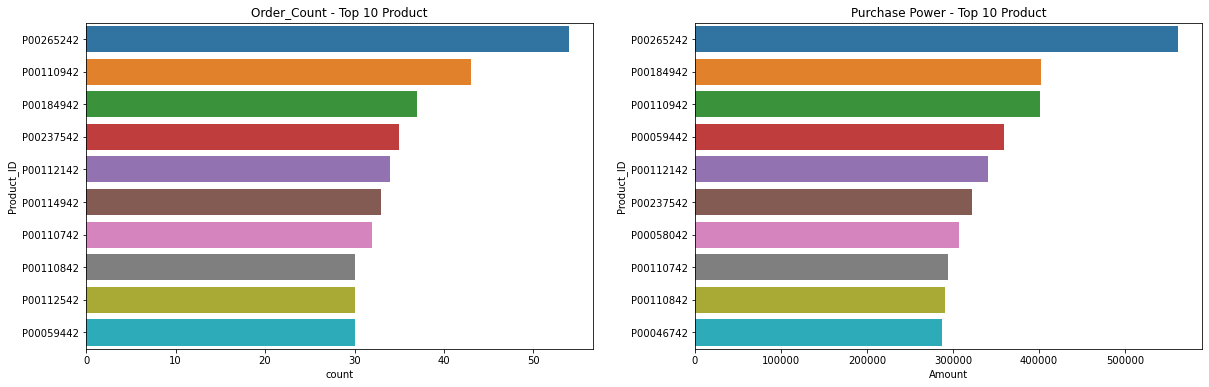

In [451]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,6))

# Plotting order count vs Top 10 Product 
sns.countplot(y = 'Product_ID', data = df, orient = 'h', 
              order = df['Product_ID'].value_counts().nlargest(10).index, ax = ax[0])

# Plotting Amount Sum Vs Top 10 Product
sns.barplot(y = 'Product_ID', x = 'Amount', data = amount_product, orient = 'h', ax = ax[1])

ax[0].set_title("Order_Count - Top 10 Product")
ax[1].set_title("Purchase Power - Top 10 Product")
plt.show()